### **Overview**
**Assignment from Dphi Explainable AI Bootcamp**

Throughout this assignment, I will be performing specific well-defined tasks that’ll strengthen my concepts in Explainable AI. I will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.


### **Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import shap
shap.initjs()

## Load the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


## Perform Basic Exploratory Data Analysis (EDA)

In [3]:
df.shape

(398, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.076209e+07,14.070997,19.331985,91.589121,651.631910,0.096289,0.103197,0.087454,0.047821,0.181122,...,16.202219,25.647286,106.882337,876.737186,0.132595,0.249983,0.269575,0.112627,0.288792,0.083445
std,1.277890e+08,3.577839,4.221225,24.706388,358.679197,0.012988,0.050805,0.079728,0.038329,0.026829,...,4.898797,6.171891,34.370030,581.202196,0.022235,0.150280,0.210256,0.065617,0.058800,0.016469
min,8.913000e+03,6.981000,10.720000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.106000,...,7.930000,12.870000,50.410000,185.200000,0.084840,0.043270,0.000000,0.000000,0.156500,0.055040
25%,8.674750e+05,11.645000,16.172500,74.690000,415.375000,0.086635,0.066013,0.028010,0.019787,0.161650,...,12.980000,20.807500,83.730000,510.325000,0.116875,0.148600,0.116500,0.063533,0.250050,0.071240
50%,9.055295e+05,13.205000,18.895000,85.660000,538.300000,0.096515,0.095090,0.059935,0.033420,0.179300,...,14.800000,25.225000,96.085000,671.500000,0.131600,0.211750,0.223050,0.100465,0.280650,0.080210
75%,8.812818e+06,15.745000,21.660000,103.700000,780.325000,0.105300,0.129550,0.126675,0.068282,0.195675,...,18.540000,29.622500,125.075000,1048.500000,0.146375,0.330650,0.377400,0.157250,0.316875,0.091990
max,9.113205e+08,28.110000,33.810000,188.500000,2501.000000,0.132600,0.345400,0.426400,0.191300,0.290600,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.577400,0.148600


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [9]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.053013,0.064714,0.053310,0.085935,-0.045771,-0.012110,0.053062,0.034495,-0.078422,...,0.060637,0.041220,0.056923,0.098540,-0.007036,-0.009724,0.024639,0.020508,-0.093087,-0.023410
radius_mean,0.053013,1.000000,0.370559,0.997984,0.986661,0.181021,0.531935,0.684128,0.833289,0.110827,...,0.969835,0.329921,0.964768,0.939238,0.140573,0.466587,0.541233,0.754886,0.148066,0.014259
texture_mean,0.064714,0.370559,1.000000,0.377602,0.371092,0.009188,0.283013,0.343909,0.347076,0.074819,...,0.402402,0.909448,0.410636,0.400265,0.131954,0.306401,0.329708,0.333799,0.095071,0.135850
perimeter_mean,0.053310,0.997984,0.377602,1.000000,0.986029,0.215509,0.580307,0.720764,0.859523,0.145323,...,0.969895,0.337438,0.969863,0.939864,0.168529,0.505573,0.575270,0.779149,0.172585,0.055418
area_mean,0.085935,0.986661,0.371092,0.986029,1.000000,0.185633,0.524159,0.696779,0.834096,0.115726,...,0.962820,0.320911,0.958728,0.958249,0.141403,0.443660,0.528460,0.731554,0.127453,0.011020
smoothness_mean,-0.045771,0.181021,0.009188,0.215509,0.185633,1.000000,0.633941,0.507177,0.536495,0.532225,...,0.213582,0.080926,0.238416,0.206867,0.774433,0.450434,0.426570,0.481344,0.354264,0.457513
compactness_mean,-0.012110,0.531935,0.283013,0.580307,0.524159,0.633941,1.000000,0.877536,0.832109,0.581543,...,0.559828,0.292928,0.613184,0.533080,0.545285,0.866952,0.810001,0.808524,0.481947,0.659135
concavity_mean,0.053062,0.684128,0.343909,0.720764,0.696779,0.507177,0.877536,1.000000,0.916765,0.474787,...,0.691384,0.333262,0.730322,0.681134,0.440080,0.762450,0.885576,0.853648,0.388345,0.498175
concave points_mean,0.034495,0.833289,0.347076,0.859523,0.834096,0.536495,0.832109,0.916765,1.000000,0.416276,...,0.835211,0.337172,0.859342,0.814219,0.441862,0.687621,0.752165,0.905909,0.341613,0.347100
symmetry_mean,-0.078422,0.110827,0.074819,0.145323,0.115726,0.532225,0.581543,0.474787,0.416276,1.000000,...,0.146293,0.107975,0.179625,0.140769,0.385940,0.449289,0.418030,0.385992,0.695937,0.423496


<AxesSubplot:>

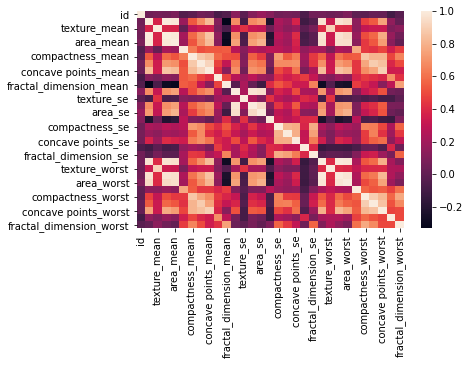

In [10]:
# Correlation plot
sns.heatmap(df.corr())

In [6]:
# (M = malignant, B = benign)
pd.Series(df.diagnosis).value_counts()

B    250
M    148
Name: diagnosis, dtype: int64

## Split the data into Train and Test Sets

In [11]:
y = df["diagnosis"]
X = df.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
X_train.head()

(318, 31) (80, 31)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
64,911366,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,...,13.36,25.40,88.14,528.1,0.1780,0.2878,0.3186,0.1416,0.2660,0.09270
55,88649001,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,...,25.05,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050
317,9113455,13.14,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.4504,0.1181,0.2563,0.08174
102,8712729,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,...,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.2318,0.1474,0.2810,0.07228
358,88119002,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,...,27.90,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568


## Use Random Forest Machine Learning Model for prediction

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 400, random_state=1, max_depth=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Evaluate the model using Accuracy Score

In [17]:
from sklearn.metrics import  accuracy_score
score = accuracy_score(y_test, predictions)
print("Accuracy:", score)

Accuracy: 0.9625


# Explaining the model with SHAP

## SHAP Explainer to derive SHAP Values for the random forest ml model

In [13]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)
print('Expected Value:', explainer.expected_value)

Expected Value: [0.66426696 0.33573304]


The Expected Value: 0.664 being displayed above will be used as the base value throughout all the visualizations below. The values above this base value will be put into class 1 (tumor Malignant) wheras the values below it will be put into class 0 (tumor Benign).
The table shows that most of the predictions is for class 0, having a Benign Cancer.

## SHAP force plot for the first row of test data

In [19]:
shap.initjs()
shap_values_first_row = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values_first_row[0], X_test.iloc[0]) 

As we can see, the feature shown in red (radius_worst) pushed his cancer to be malignant. 

We can see that the features shown in blue played a vital role in pushing his cancer to be benign.

Overall, his final score is 0.33 which is much less than the base value. Thus, he is classified as having a label of 0 (False) i.e Benign cancer. 

## SHAP force plot for all the rows of the data

In [22]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

The last 44 test samples have an inclination towards mostly having Malignant Cancer and they have high perimeter_worst and high radius_worst.

Most of the first 35 test samples probably have Benign Cancer and they have less perimeter_worst and radius_worst comparing to the other samples.

## SHAP summary plot using all the features in the data

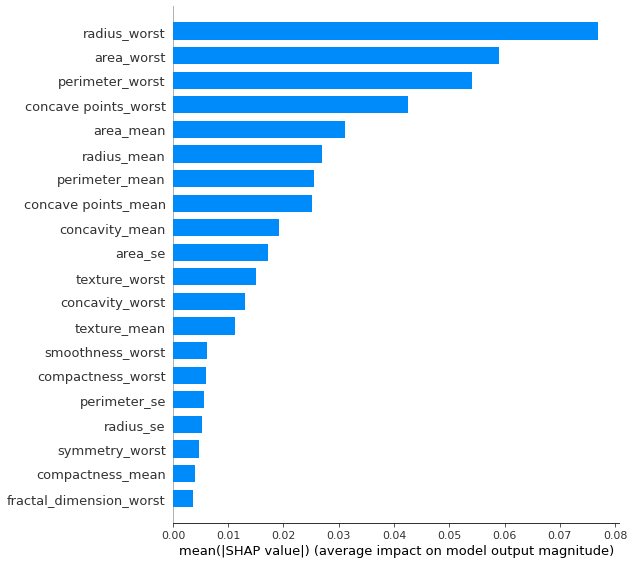

In [26]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test, plot_type="bar")

From the above simple bar chart, we observe that radius_worst, area_worst and perimeter_worst are the top 3 important features while determining the type of cancer.

On the other hand, compactness_mean and fractal_dimension_mean are the least important features while determining the cancer type.

## SHAP dependence plot using all features in the data

Feature 0


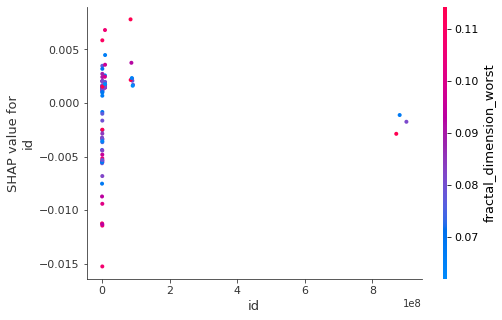

Feature 1


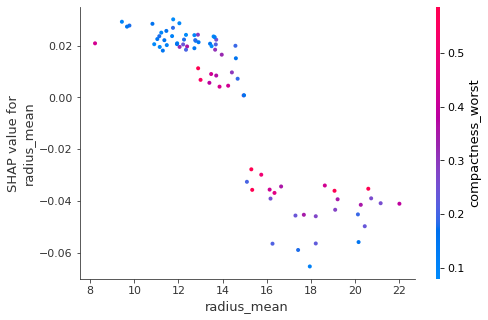

Feature 2


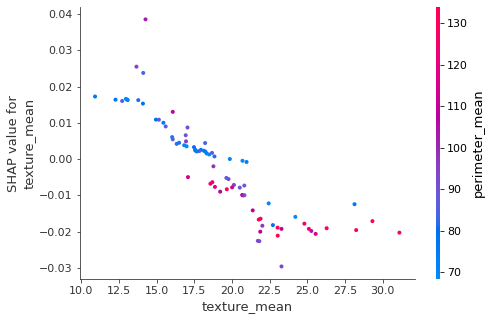

Feature 3


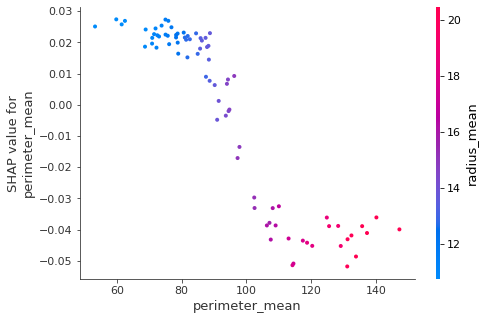

Feature 4


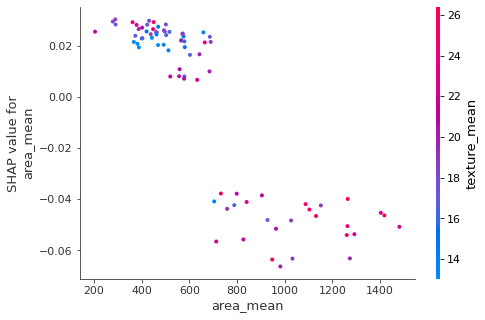

Feature 5


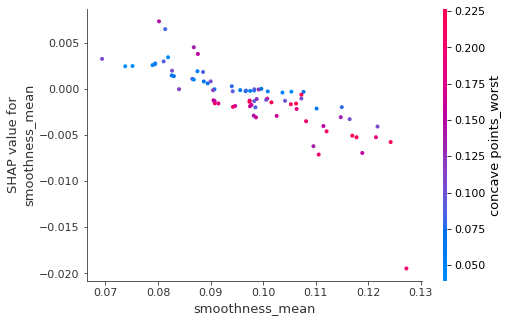

Feature 6


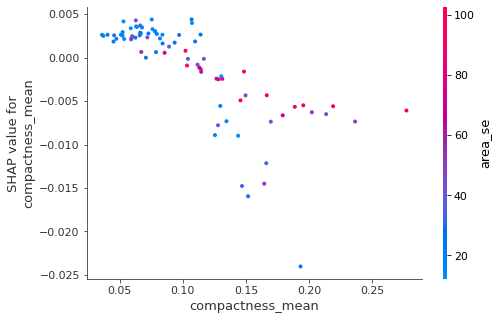

Feature 7


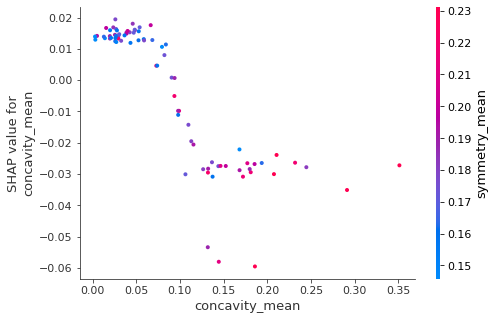

Feature 8


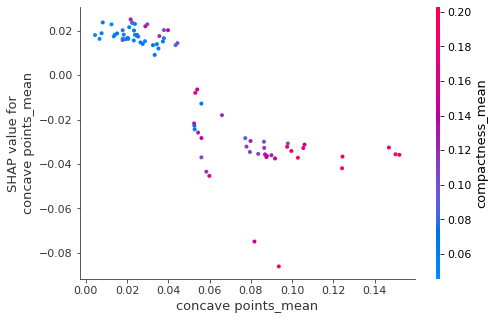

Feature 9


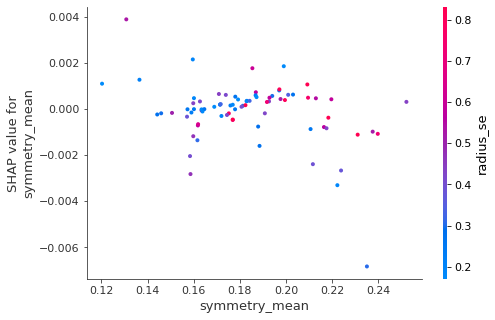

Feature 10


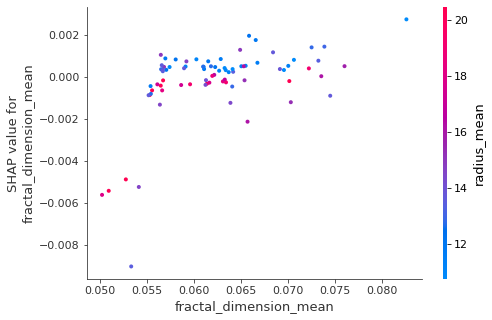

Feature 11


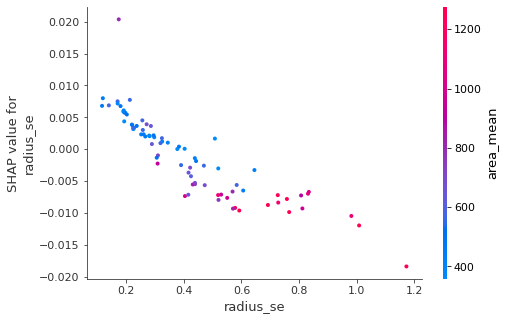

Feature 12


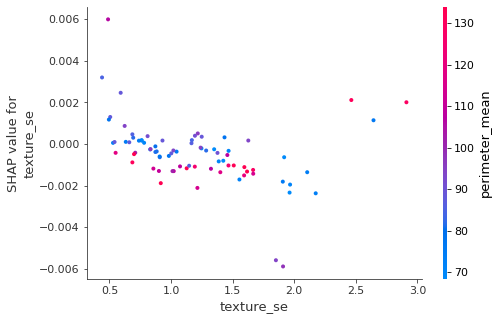

Feature 13


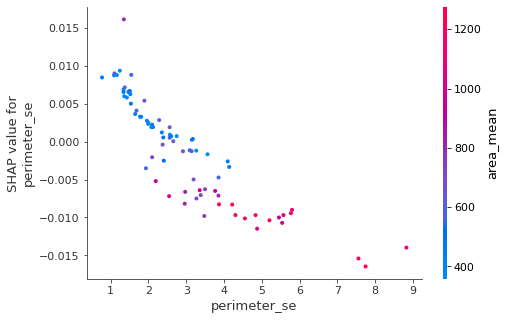

Feature 14


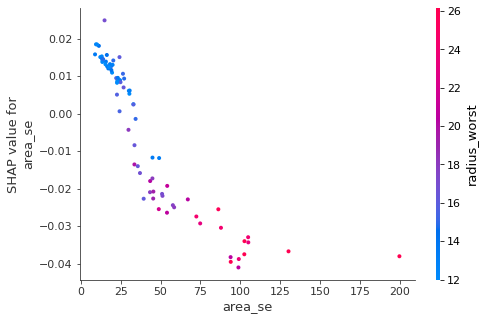

Feature 15


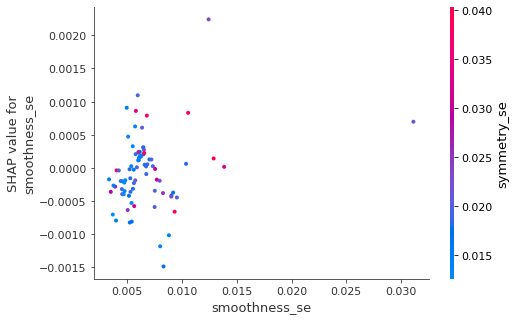

Feature 16


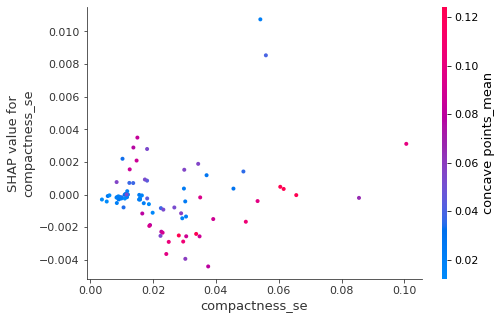

Feature 17


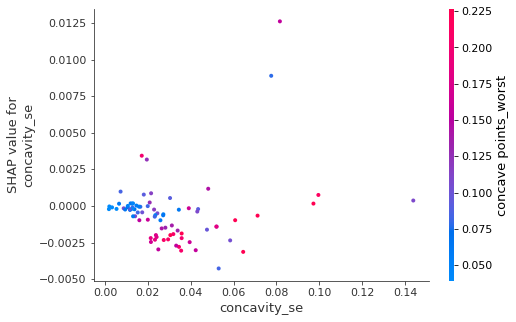

Feature 18


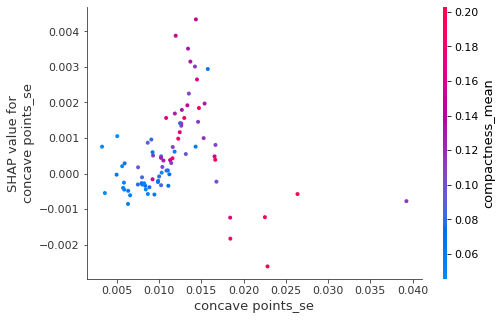

Feature 19


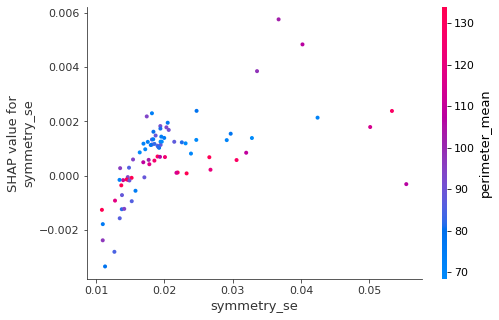

Feature 20


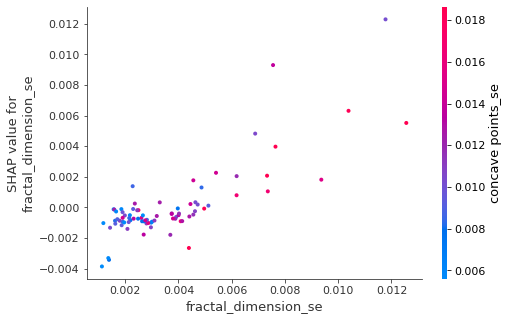

Feature 21


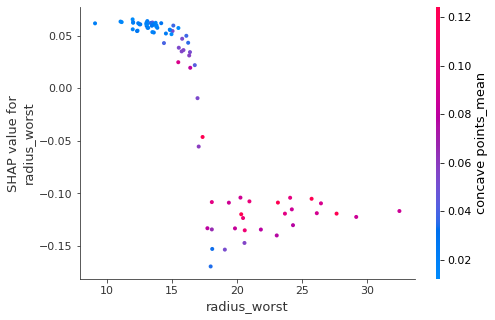

Feature 22


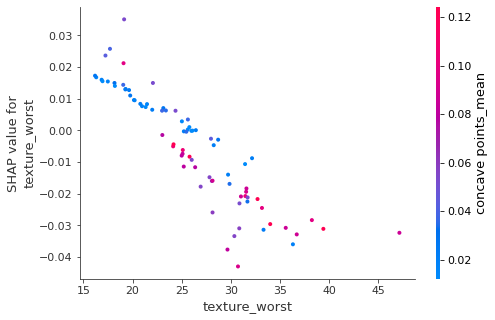

Feature 23


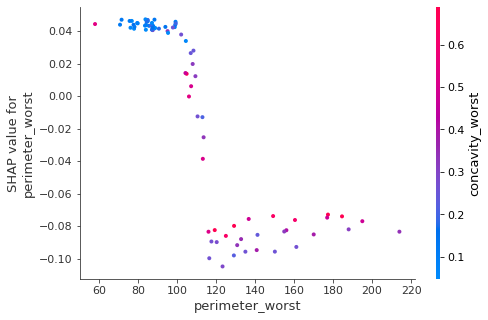

Feature 24


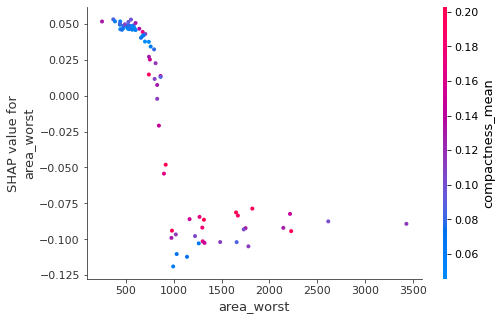

Feature 25


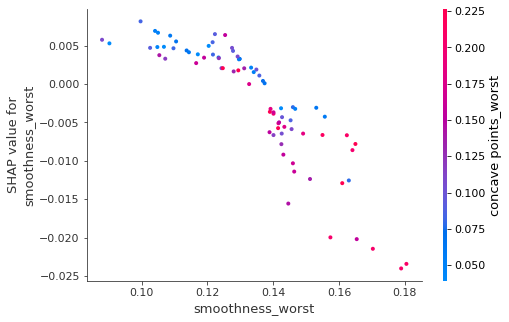

Feature 26


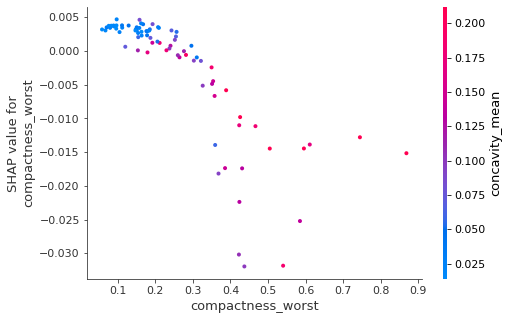

Feature 27


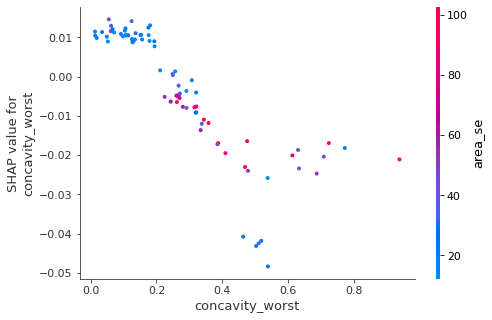

Feature 28


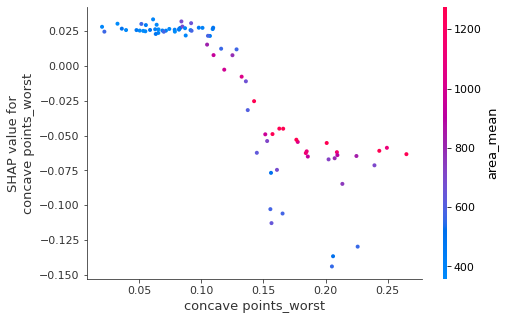

Feature 29


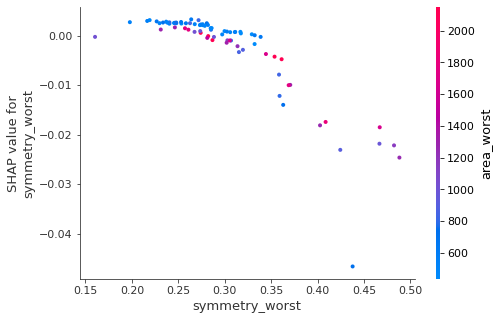

In [27]:
shap.initjs()
for i in range(0,30):
  print('Feature {}'.format(i))
  shap.dependence_plot(i, shap_values[0], X_test)